# **Symptoms: Preprocessing & Analysis**

## **Importing data and packages**

In [ ]:
!pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import io
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pickle
import math

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import preprocessing, model_selection
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.metrics import precision_recall_fscore_support, classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.cross_decomposition import PLSRegression
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier, VotingClassifier
from sklearn.datasets import load_digits
from sklearn.manifold import Isomap
import umap.umap_ as umap

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
url1 = '/content/drive/MyDrive/COVID project datasets/combined_data.csv'
url2 = '/content/drive/MyDrive/COVID project datasets/Covid_Dataset.csv'
train_data = pd.read_csv(url1)
new_data = pd.read_csv(url2)
training_data = train_data[['a', 'g', 'smoker', 'cold', 'cough', 'diarrhoea', 'fever',
                            'loss_of_smell', 'mp', 'test_status', 'bd', 'ftg', 'st']]
training_newdata = training_data[training_data['test_status'].notnull()]

## **Pre-processing**

In [ ]:
def printinfo(training_data):
    temp = pd.DataFrame(index = training_data.columns)
    temp['data_type'] = training_data.dtypes
    temp['null_count'] = training_data.isnull().sum()
    return temp

def isNaN(num):
    return num != num

def decade(x):
  return math.ceil(x/10)

In [ ]:
def preprocessing(training_data):
    import math
    from sklearn import preprocessing

    training_data['age_decade'] = training_data['a'].apply(lambda x: decade(x))
    gender = preprocessing.LabelEncoder()
    training_data['gender_label'] = gender.fit_transform(training_data['g'])
    training_data['smoker'] = training_data['smoker'].apply(lambda x: 1 if x=='True' or x == 'y' else 0)
    training_data['cold'] = training_data['cold'].apply(lambda x: 1 if not(isNaN(x)) else 0)
    training_data['cough'] = training_data['cough'].apply(lambda x: 1 if not(isNaN(x)) else 0)
    training_data['diarrhoea'] = training_data['diarrhoea'].apply(lambda x: 1 if not(isNaN(x)) else 0)
    training_data['fever'] = training_data['fever'].apply(lambda x: 1 if not(isNaN(x)) else 0)
    training_data['loss_of_smell'] = training_data['loss_of_smell'].apply(lambda x: 1 if not(isNaN(x)) else 0)
    training_data['mp'] = training_data['mp'].apply(lambda x: 1 if not(isNaN(x)) else 0)                         # muscle pain
    training_data['test_status'] = training_data['test_status'].apply(lambda x: 1 if x=='p' else 0)
    training_data['bd'] = training_data['bd'].apply(lambda x: 1 if not(isNaN(x)) else 0)                         # breathing difficuties
    training_data['ftg'] = training_data['ftg'].apply(lambda x: 1 if not(isNaN(x)) else 0)                       # fatigue
    training_data['st'] = training_data['st'].apply(lambda x: 1 if not(isNaN(x)) else 0)                         # sore throat
    del training_data['g']
    del training_data['a']
    return training_data

In [ ]:
def preprocessing4(new_data):
  import math
  from sklearn import preprocessing
  data2 = pd.DataFrame()
  data2['test_status'] = new_data['COVID-19'] #[['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat', 'Running Nose', 'Fatigue ', 'COVID-19']]
  for i in new_data.columns:
    data2[i] = new_data[i].apply(lambda x: 1 if x=='Yes' else 0)
  data2['test_status'] = data2['test_status'].apply(lambda x: 1 if x=='Yes' else 0)
  del data2['COVID-19']
  del data2['Sanitization from Market']
  del data2['Wearing Masks']
  del data2['Gastrointestinal ']
  del data2['Family working in Public Exposed Places']
  del data2['Visited Public Exposed Places']
  del data2['Attended Large Gathering']
  return data2

In [ ]:
total_data1 = preprocessing(training_newdata)
total_data2 = preprocessing4(new_data)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

In [ ]:
def find_label(data):
  labels = data['test_status']
  del data['test_status']
  return data, labels

def split_data(training_data, labels):
  X_train, X_val,Y_train,Y_val = train_test_split(training_data,labels,test_size=0.20,random_state=40)
  return training_data, X_train, X_val, Y_train, Y_val

## **Data Analysis Functions**

In [ ]:
def box_plot(data):
  N = len(data.columns)
  if N<=9:
    plt.figure(figsize = (20,10))
    for i in range(N):
      plt.subplot(3, 3, i+1)
      sns.boxplot(x=data[data.columns[i]])
    plt.show()
  else:
    plt.figure(figsize = (20,10))
    for i in range(9):
      plt.subplot(3, 3, i+1)
      sns.boxplot(x=data[data.columns[i]])
    plt.show()
    plt.figure(figsize = (20,10))
    for i in range(N-9):
      plt.subplot(3, 3, i+1)
      sns.boxplot(x=data[data.columns[9+i]])
    plt.show()

In [ ]:
def kde_plot(data):
  N = len(data.columns)
  if N<=9:
    plt.figure(figsize = (20,10))
    for i in range(N):
      plt.subplot(3, 3, i+1)
      sns.kdeplot(x=data[data.columns[i]])
    plt.show()
  else:
    plt.figure(figsize = (20,10))
    for i in range(9):
      plt.subplot(3, 3, i+1)
      sns.kdeplot(x=data[data.columns[i]])
    plt.show()
    plt.figure(figsize = (20,10))
    for i in range(N-9):
      plt.subplot(3, 3, i+1)
      sns.kdeplot(x=data[data.columns[9+i]])
    plt.show()

In [ ]:
def analysis(data):
  print('Skew measurement of each column:', '\n')
  print(data.skew(), "\n")
  print('Box Plots:', '\n')
  box_plot(data)
  print('KDE Plots:', '\n')
  kde_plot(data)

In [ ]:
def correlation_plot(training_newdata):
    corr = abs(training_newdata.corr()) # correlation matrix
    lower_triangle = np.tril(corr, k = -1)  # select only the lower triangle of the correlation matrix
    mask = lower_triangle == 0  # to mask the upper triangle in the following heatmap

    plt.figure(figsize = (15,10))  # setting the figure size
    sns.heatmap(lower_triangle, center=0.5, cmap= 'Blues', xticklabels = corr.index,
                yticklabels = corr.columns,cbar = False, annot= True, linewidths= 1, mask = mask)   #Heatmap
    plt.show()

## **Plots and Models functions**

In [ ]:
def find_scores(data, model):
  scores = cross_validate(model, data, labels1, cv=3, scoring=('accuracy', 'precision', 'recall', 'f1', 'roc_auc'), return_train_score=False)
  scores['test_accuracy'] = scores['test_accuracy'].mean()
  scores['fit_time'] = scores['fit_time'].mean()
  scores['test_precision'] = scores['test_precision'].mean()
  scores['test_recall'] = scores['test_recall'].mean()
  scores['test_f1'] = scores['test_f1'].mean()
  scores['test_roc_auc'] = scores['test_roc_auc'].mean()
  scores['score_time'] = scores['score_time'].mean()
  scores.pop('score_time')
  df = pd.DataFrame.from_dict([scores])
  return df

In [ ]:
def summary_report(data):
  #data, X_train, X_val, Y_train, Y_val = split_data(data)
  #results = {}
  model_names = ['Logistic Regression', 'LDA', 'K-Neighbors Classifier', 'Decision Tree Classifier', 'Random Forest Classifier', 'Gaussian Naive Bayes', 'SVM',
                 'Bagging Classifier', 'Ada Boost Classifier', 'Gradient Boosting Classifier', 'Ensemble: Stacking Classifier']
                 #, 'Ensemble: VotingClassifier']
  #score_param = ['Training-Time', 'Accuracy', 'F1 Score', 'Precision', 'Recall', 'AUC-ROC']
  score_param = ['Accuracy', 'F1 Score', 'Precision', 'Recall', 'AUC-ROC']

  scores = pd.DataFrame()
  model1 = LogisticRegression()
  scores = scores.append(find_scores(data, model1), ignore_index=True)
  model2 = LinearDiscriminantAnalysis()
  scores = scores.append(find_scores(data, model2), ignore_index=True)
  model3 = KNeighborsClassifier()
  scores = scores.append(find_scores(data, model3), ignore_index=True)
  model4 = DecisionTreeClassifier()
  scores = scores.append(find_scores(data, model4), ignore_index=True)
  model5 = RandomForestClassifier()
  scores = scores.append(find_scores(data, model5), ignore_index=True)
  model6 = GaussianNB()
  scores = scores.append(find_scores(data, model6), ignore_index=True)
  model7 = SVC()
  scores = scores.append(find_scores(data, model7), ignore_index=True)
  model8 = BaggingClassifier()
  scores = scores.append(find_scores(data, model8), ignore_index=True)
  model9 = AdaBoostClassifier()
  scores = scores.append(find_scores(data, model9), ignore_index=True)
  model10 = GradientBoostingClassifier()
  scores = scores.append(find_scores(data, model10), ignore_index=True)
  estimators = [('LR', model1), ('LDA', model2), ('KNN', model3), ('DT', model4), ('RF', model5),
                ('GNB', model6), ('SVM', model7), ('BG', model8),  ('AB', model9), ('GB', model10)]
  model11 = StackingClassifier(estimators = estimators)
  scores = scores.append(find_scores(data, model11), ignore_index=True)
  #model12 = VotingClassifier(estimators = estimators, voting='hard')
  #scores = scores.append(find_scores(data, model12), ignore_index=True)
  scores.index = model_names
  scores.columns = score_param
  #scores['Training-Time'] = scores['Training-Time'].round(decimals = 4)
  scores['Accuracy'] = scores['Accuracy']*100
  scores['Accuracy'] = scores['Accuracy'].round(decimals = 2)
  scores['F1 Score'] = scores['F1 Score']*100
  scores['F1 Score'] = scores['F1 Score'].round(decimals = 2)
  scores['Precision'] = scores['Precision']*100
  scores['Precision'] = scores['Precision'].round(decimals = 2)
  scores['Recall'] = scores['Recall']*100
  scores['Recall'] = scores['Recall'].round(decimals = 2)
  scores['AUC-ROC'] = scores['AUC-ROC']*100
  scores['AUC-ROC'] = scores['AUC-ROC'].round(decimals = 2)
  pd.set_option('display.float_format','{:.3f}'.format)
  return scores

In [ ]:
# Give the data as input and parameter (Accuracy/F1 Score, etc.) to plot for each of the 11 models

def model_plot(data, var):
  model_names = ['Logistic Regression', 'LDA', 'K-Neighbors Classifier', 'Decision Tree Classifier', 'Random Forest Classifier', 'Gaussian Naive Bayes', 'SVM',
                 'Bagging Classifier', 'Ada Boost Classifier', 'Gradient Boosting Classifier', 'Ensemble: Stacking Classifier']
  score = summary_report(data)
  acc = score[var]
  plt.plot(model_names, acc)
  plt.xticks(rotation=90)
  plt.show()

# **Coswara Dataset results**

In [ ]:
data1, labels1 = find_label(total_data1)

## **Data Analysis**

In [ ]:
analysis(data1)

In [ ]:
correlation_plot(data1)

## **Model plot**

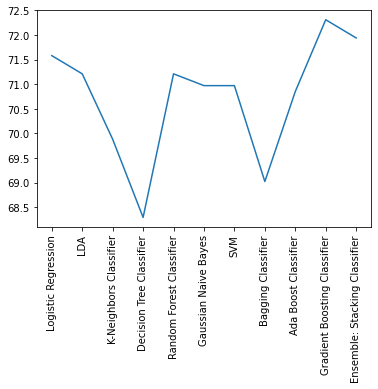

In [ ]:
model_plot(data1, 'Accuracy')

In [ ]:
def find_scores(data, model):
  scores = cross_validate(model, data, labels1, cv=3, scoring=('accuracy', 'precision', 'recall', 'f1', 'roc_auc'), return_train_score=False)
  scores['test_accuracy'] = scores['test_accuracy'].mean()
  scores['fit_time'] = scores['fit_time'].mean()
  scores['test_precision'] = scores['test_precision'].mean()
  scores['test_recall'] = scores['test_recall'].mean()
  scores['test_f1'] = scores['test_f1'].mean()
  scores['test_roc_auc'] = scores['test_roc_auc'].mean()
  scores['score_time'] = scores['score_time'].mean()
  scores.pop('score_time')
  scores.pop('fit_time')
  df = pd.DataFrame.from_dict([scores])
  return df

In [ ]:
def summary_report1(data):
  #data, X_train, X_val, Y_train, Y_val = split_data(data)
  #results = {}
  model_names = ['Logistic Regression', 'Random Forest Classifier', 'Gaussian Naive Bayes', 'SVM',
                 'Ada Boost Classifier', 'Gradient Boosting Classifier', 'Ensemble: Stacking Classifier']
                 #, 'Ensemble: VotingClassifier']
  score_param = ['Accuracy', 'F1 Score', 'Precision', 'Recall', 'AUC-ROC']

  scores = pd.DataFrame()
  model1 = LogisticRegression()
  scores = scores.append(find_scores(data, model1), ignore_index=True)
  #model2 = LinearDiscriminantAnalysis()
  #scores = scores.append(find_scores(data, model2), ignore_index=True)
  #model3 = KNeighborsClassifier()
  #scores = scores.append(find_scores(data, model3), ignore_index=True)
  #model4 = DecisionTreeClassifier()
  #scores = scores.append(find_scores(data, model4), ignore_index=True)
  model5 = RandomForestClassifier()
  scores = scores.append(find_scores(data, model5), ignore_index=True)
  model6 = GaussianNB()
  scores = scores.append(find_scores(data, model6), ignore_index=True)
  model7 = SVC()
  scores = scores.append(find_scores(data, model7), ignore_index=True)
  #model8 = BaggingClassifier()
  #scores = scores.append(find_scores(data, model8), ignore_index=True)
  model9 = AdaBoostClassifier()
  scores = scores.append(find_scores(data, model9), ignore_index=True)
  model10 = GradientBoostingClassifier()
  scores = scores.append(find_scores(data, model10), ignore_index=True)
  estimators = [('LR', model1), ('RF', model5),
                ('GNB', model6), ('SVM', model7),  ('AB', model9), ('GB', model10)]
  model11 = StackingClassifier(estimators = estimators)
  scores = scores.append(find_scores(data, model11), ignore_index=True)
  scores.index = model_names
  scores.columns = score_param
  #scores['Training-Time'] = scores['Training-Time'].round(decimals = 4)
  scores['Accuracy'] = scores['Accuracy']*100
  scores['Accuracy'] = scores['Accuracy'].round(decimals = 2)
  scores['F1 Score'] = scores['F1 Score']*100
  scores['F1 Score'] = scores['F1 Score'].round(decimals = 2)
  scores['Precision'] = scores['Precision']*100
  scores['Precision'] = scores['Precision'].round(decimals = 2)
  scores['Recall'] = scores['Recall']*100
  scores['Recall'] = scores['Recall'].round(decimals = 2)
  scores['AUC-ROC'] = scores['AUC-ROC']*100
  scores['AUC-ROC'] = scores['AUC-ROC'].round(decimals = 2)
  pd.set_option('display.float_format','{:.3f}'.format)
  return scores

In [ ]:
summary_report1(data1)

,Accuracy,F1 Score,Precision,Recall,AUC-ROC
Logistic Regression,71.580,74.620,62.970,67.830,79.070
Random Forest Classifier,71.090,71.050,68.620,69.370,74.740
Gaussian Naive Bayes,70.970,74.190,63.220,67.530,80.220
SVM,70.970,74.010,63.220,67.440,78.960
Ada Boost Classifier,70.850,74.080,60.660,66.450,78.070
Gradient Boosting Classifier,72.070,72.130,69.650,70.470,77.720
Ensemble: Stacking Classifier,71.460,72.440,67.330,69.170,78.670


In [ ]:
# Give the data as input and parameter (Accuracy/F1 Score, etc.) to obtain bar plot for each of the 11 models

def model_bar(data, var):
  model_names = ['Logistic Regression', 'Random Forest Classifier', 'Gaussian Naive Bayes', 'SVM',
                 'Ada Boost Classifier', 'Gradient Boosting Classifier', 'Ensemble: Stacking Classifier']
  score = summary_report1(data)
  acc = score[var]
  plt.bar(model_names, acc)
  plt.xticks(rotation=90)
  plt.ylim([50, 80])
  plt.show()

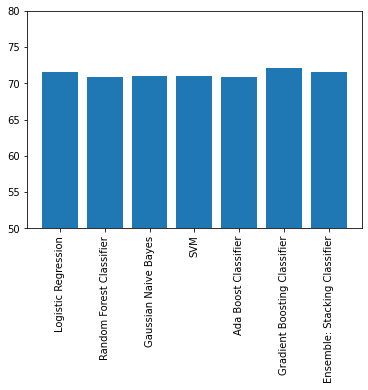

In [ ]:
model_bar(data1, 'Accuracy')

## **PCA**

In [ ]:
def complete_PCA_analysis(data, var):
  sc = StandardScaler()
  data2 = sc.fit_transform(data)
  model_names = ['Logistic Regression', 'LDA', 'K-Neighbors Classifier', 'Decision Tree Classifier', 'Random Forest Classifier', 'Gaussian Naive Bayes', 'SVM',
                  'Bagging Classifier', 'Ada Boost Classifier', 'Gradient Boosting Classifier', 'Ensemble: Stacking Classifier']
  for i in range(2, data2.shape[1]):
      pca = PCA(n_components = i)
      data3 = pca.fit_transform(data2)
      explained_variance = pca.explained_variance_ratio_
      #print('Result for PCA : n_components=', i)
      score = summary_report(data3)
      plt.plot(model_names,score[var], label=i)
  plt.xticks(rotation=90)
  plt.legend()
  plt.show()

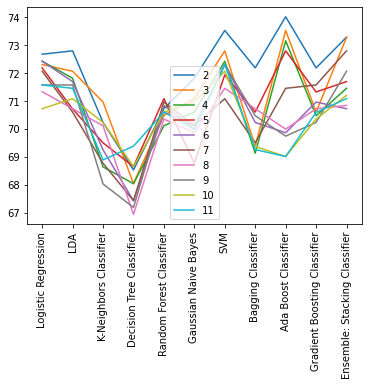

In [ ]:
complete_PCA_analysis(data1, 'Accuracy')

In [ ]:
complete_PCA_analysis(data1, 'F1 Score')

In [ ]:
def PCA_analysis_modified(data, var):
  sc = StandardScaler()
  data2 = sc.fit_transform(data)
  model_names = ['Logistic Regression', 'LDA', 'Random Forest Classifier', 'Gaussian Naive Bayes', 'SVM',
                  'Ada Boost Classifier', 'Gradient Boosting Classifier', 'Ensemble: Stacking Classifier']
  for i in range(2, 8):
      pca = PCA(n_components = i)
      data3 = pca.fit_transform(data2)
      explained_variance = pca.explained_variance_ratio_
      #print('Result for PCA : n_components=', i)
      score = summary_report(data3)
      score = score.drop(['K-Neighbors Classifier', 'Decision Tree Classifier', 'Bagging Classifier'])

      plt.plot(model_names,score[var], label=i)
  plt.xticks(rotation=90)
  plt.legend()
  plt.show()

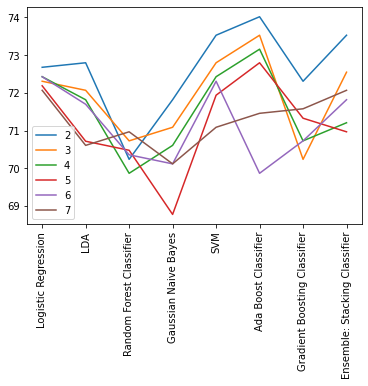

In [ ]:
PCA_analysis_modified(data1, 'Accuracy')

In [ ]:
PCA_analysis_modified(data1, 'F1 Score')

In [ ]:
def n_plotPCA(data):
    sc = StandardScaler()
    data2 = sc.fit_transform(data)
    #model_names = ['Logistic Regression', 'LDA', 'K-Neighbors Classifier', 'Decision Tree Classifier', 'Random Forest Classifier', 'Gaussian Naive Bayes', 'SVM',
                    #'Bagging Classifier', 'Ada Boost Classifier', 'Gradient Boosting Classifier', 'Ensemble: Stacking Classifier']
    #plt.figure(figsize=(100, 100)
    n_array = []
    lr, lda, knn, dst, rf, gnb, svm, bc, abc, gbc, ensemble = [], [], [], [], [], [], [], [], [], [], []
    for i in range(2, len(data.columns)):
        n_array.append(i)
        pca = PCA(n_components = i)
        data3 = pca.fit_transform(data2)
        explained_variance = pca.explained_variance_ratio_
        #print('Result for PCA : n_components=', i)
        score = summary_report(data3)
        lr.append(score['Accuracy'][0])
        lda.append(score['Accuracy'][1])
        knn.append(score['Accuracy'][2])
        dst.append(score['Accuracy'][3])
        rf.append(score['Accuracy'][4])
        gnb.append(score['Accuracy'][5])
        svm.append(score['Accuracy'][6])
        bc.append(score['Accuracy'][7])
        abc.append(score['Accuracy'][8])
        gbc.append(score['Accuracy'][9])
        ensemble.append(score['Accuracy'][10])
    return n_array, lr, lda, knn, dst, rf, gnb, svm, bc, abc, gbc, ensemble

In [ ]:
def n_tablePCA(data):
    sc = StandardScaler()
    data2 = sc.fit_transform(data)
    final_score = pd.DataFrame()
    for i in range(2, len(data.columns)):
        name = 'n_comp=' + str(i)
        pca = PCA(n_components = i)
        data3 = pca.fit_transform(data2)
        explained_variance = pca.explained_variance_ratio_
        score = summary_report(data3)
        final_score[name] = score['Accuracy']
    return final_score

In [ ]:
n_tablePCA(data1)

,n_comp=2,n_comp=3,n_comp=4,n_comp=5,n_comp=6,n_comp=7,n_comp=8,n_comp=9,n_comp=10,n_comp=11
Logistic Regression,72.680,72.310,72.430,72.190,72.430,72.070,71.340,71.580,70.730,71.580
LDA,72.800,72.070,71.820,70.720,71.700,70.610,70.730,71.580,71.090,71.460
K-Neighbors Classifier,70.240,70.730,69.140,69.020,68.410,69.390,70.730,68.040,70.240,68.900
Decision Tree Classifier,68.540,67.560,68.660,67.930,67.440,66.590,67.070,67.070,68.650,69.390
Random Forest Classifier,70.240,70.120,70.000,70.480,71.460,71.220,70.000,70.240,70.240,70.730
Gaussian Naive Bayes,71.820,71.090,70.610,68.780,70.120,70.120,69.870,69.990,70.970,69.990
SVM,73.530,72.800,72.430,71.940,72.310,71.090,71.460,72.310,72.070,72.310
Bagging Classifier,70.480,68.290,69.510,69.750,68.290,70.000,67.560,70.240,69.020,69.750
Ada Boost Classifier,74.020,73.530,73.160,72.800,69.870,71.460,70.000,69.750,69.020,69.020
Gradient Boosting Classifier,72.310,70.730,70.480,71.330,70.490,71.340,70.850,70.480,70.360,70.480


### **n_component Plots**

In [ ]:
n_array, lr, lda, knn, dst, rf, gnb, svm, bc, abc, gbc, ensemble = n_plotPCA(data1)

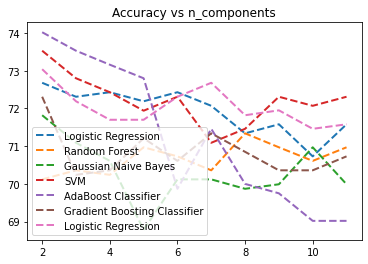

In [ ]:
plt.title('Accuracy vs n_components')
plt.plot(n_array, lr, linestyle='--', linewidth=2, label='Logistic Regression')
plt.plot(n_array, rf, linestyle='--', linewidth=2, label='Random Forest')
plt.plot(n_array, gnb, linestyle='--', linewidth=2, label='Gaussian Naive Bayes')
plt.plot(n_array, svm, linestyle='--', linewidth=2, label='SVM')
plt.plot(n_array, abc, linestyle='--', linewidth=2, label='AdaBoost Classifier')
plt.plot(n_array, gbc, linestyle='--', linewidth=2, label='Gradient Boosting Classifier')
plt.plot(n_array, ensemble, linestyle='--', linewidth=2, label='Logistic Regression')
plt.legend()
plt.show()

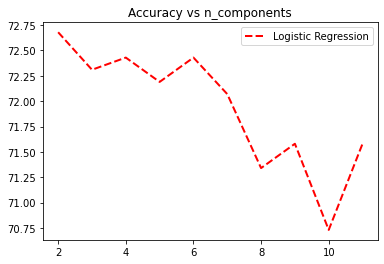

In [ ]:
plt.title('Accuracy vs n_components')
plt.plot(n_array, lr, linestyle='--', linewidth=2, color = 'red', label='Logistic Regression')
plt.legend()
plt.show()

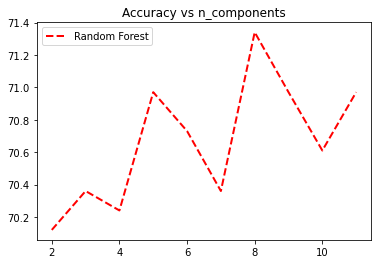

In [ ]:
plt.title('Accuracy vs n_components')
plt.plot(n_array, rf, linestyle='--', linewidth=2, color = 'red', label='Random Forest')
plt.legend()
plt.show()

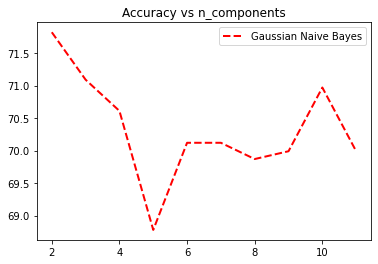

In [ ]:
plt.title('Accuracy vs n_components')
plt.plot(n_array, gnb, linestyle='--', linewidth=2, color = 'red', label='Gaussian Naive Bayes')
plt.legend()
plt.show()

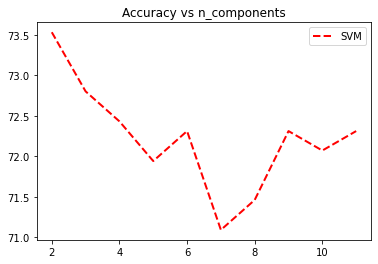

In [ ]:
plt.title('Accuracy vs n_components')
plt.plot(n_array, svm, linestyle='--', linewidth=2, color = 'red', label='SVM')
plt.legend()
plt.show()

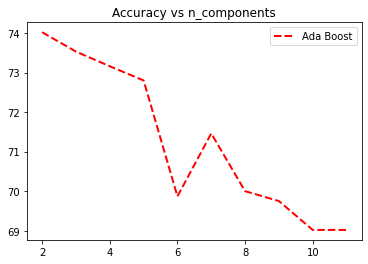

In [ ]:
plt.title('Accuracy vs n_components')
plt.plot(n_array, abc, linestyle='--', linewidth=2, color = 'red', label='Ada Boost')
plt.legend()
plt.show()

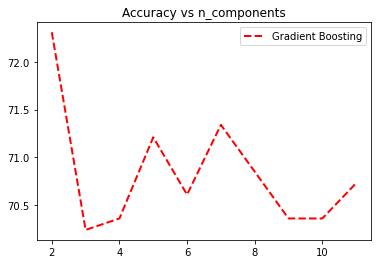

In [ ]:
plt.title('Accuracy vs n_components')
plt.plot(n_array, gbc, linestyle='--', linewidth=2, color = 'red', label='Gradient Boosting')
plt.legend()
plt.show()

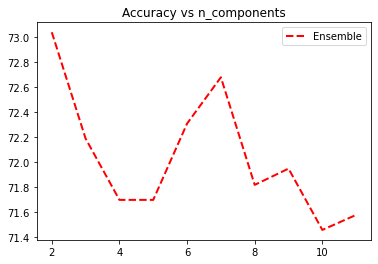

In [ ]:
plt.title('Accuracy vs n_components')
plt.plot(n_array, ensemble, linestyle='--', linewidth=2, color = 'red', label='Ensemble')
plt.legend()
plt.show()

### **Conclusions for PCA**

In [ ]:
# best n_component = 2
#
sc = StandardScaler()
data1p = sc.fit_transform(data1)
pca = PCA(n_components = 2)
data1p = pca.fit_transform(data1p)

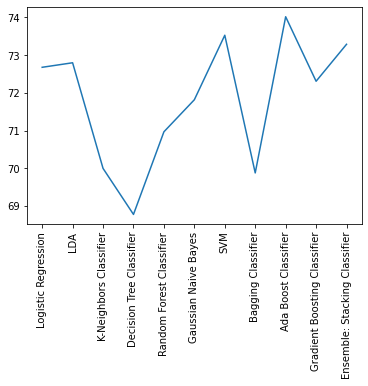

In [ ]:
model_plot(data1p, 'Accuracy')

In [ ]:
model_plot(data1p, 'F1 Score')

## **UMAP**

In [ ]:
reducer = umap.UMAP()
data1u = reducer.fit_transform(data1)

In [ ]:
data1u.shape

In [ ]:
model_plot(data1u, 'Accuracy')

In [ ]:
model_plot(data1u, 'F1 Score')

## **ISOMAP**

In [ ]:
def n_isomap(data):
    #model_names = ['Logistic Regression', 'LDA', 'K-Neighbors Classifier', 'Decision Tree Classifier', 'Random Forest Classifier', 'Gaussian Naive Bayes', 'SVM',
                    #'Bagging Classifier', 'Ada Boost Classifier', 'Gradient Boosting Classifier', 'Ensemble: Stacking Classifier']
    #plt.figure(figsize=(100, 100)
    n_array = []
    lr, lda, knn, dst, rf, gnb, svm, bc, abc, gbc, ensemble = [], [], [], [], [], [], [], [], [], [], []
    for i in range(2, 12):
        n_array.append(i)
        embedding = Isomap(n_components=i)
        data2 = embedding.fit_transform(data[:len(data)])
        #print('Result for PCA : n_components=', i)
        score = summary_report(data2)
        lr.append(score['Accuracy'][0])
        lda.append(score['Accuracy'][1])
        knn.append(score['Accuracy'][2])
        dst.append(score['Accuracy'][3])
        rf.append(score['Accuracy'][4])
        gnb.append(score['Accuracy'][5])
        svm.append(score['Accuracy'][6])
        bc.append(score['Accuracy'][7])
        abc.append(score['Accuracy'][8])
        gbc.append(score['Accuracy'][9])
        ensemble.append(score['Accuracy'][10])
    return n_array, lr, lda, knn, dst, rf, gnb, svm, bc, abc, gbc, ensemble

In [ ]:
def n_tableISOMAP(data):
    final_score = pd.DataFrame()
    for i in range(2, len(data.columns)):
        name = 'n_comp =' + str(i)
        embedding = Isomap(n_components=i)
        data2 = embedding.fit_transform(data[:len(data)])
        score = summary_report(data2)
        final_score[name] = score['Accuracy']
    return final_score

In [ ]:
n_tableISOMAP(data1)

### **n_component Plots**

In [ ]:
n_array, lr, lda, knn, dst, rf, gnb, svm, bc, abc, gbc, ensemble = n_isomap(data1)

In [ ]:
plt.title('Accracy vs n_components')
plt.plot(n_array, lr, linestyle='--', linewidth=2, label='Logistic Regression')
plt.plot(n_array, rf, linestyle='--', linewidth=2, label='Random Forest')
plt.plot(n_array, gnb, linestyle='--', linewidth=2, label='Gaussian Naive Bayes')
plt.plot(n_array, svm, linestyle='--', linewidth=2, label='SVM')
plt.plot(n_array, abc, linestyle='--', linewidth=2, label='AdaBoost Classifier')
plt.plot(n_array, gbc, linestyle='--', linewidth=2, label='Gradient Boosting Classifier')
plt.plot(n_array, ensemble, linestyle='--', linewidth=2, label='Logistic Regression')
plt.legend()
plt.show()

In [ ]:
plt.title('Accuracy vs n_components')
plt.plot(n_array, lr, linestyle='--', linewidth=2, color = 'red', label='Logistic Regression')
plt.legend()
plt.show()

In [ ]:
plt.title('Accuracy vs n_components')
plt.plot(n_array, rf, linestyle='--', linewidth=2, color = 'red', label='Random Forest')
plt.legend()
plt.show()

In [ ]:
plt.title('Accuracy vs n_components')
plt.plot(n_array, gnb, linestyle='--', linewidth=2, color = 'red', label='Gaussian Naive Bayes')
plt.legend()
plt.show()

In [ ]:
plt.title('Accuracy vs n_components')
plt.plot(n_array, svm, linestyle='--', linewidth=2, color = 'red', label='SVM')
plt.legend()
plt.show()

In [ ]:
plt.title('Accuracy vs n_components')
plt.plot(n_array, abc, linestyle='--', linewidth=2, color = 'red', label='Ada Boost')
plt.legend()
plt.show()

In [ ]:
plt.title('Accuracy vs n_components')
plt.plot(n_array, gbc, linestyle='--', linewidth=2, color = 'red', label='Gradient Boosting')
plt.legend()
plt.show()

In [ ]:
plt.title('Accuracy vs n_components')
plt.plot(n_array, ensemble, linestyle='--', linewidth=2, color = 'red', label='Ensemble')
plt.legend()
plt.show()

### **Conclusions for ISOMAP**

In [ ]:
# best n_component = 11
#
embedding = Isomap(n_components=11)
data1i = embedding.fit_transform(data1[:len(data1)])

In [ ]:
model_plot(data1i, 'Accuracy')

In [ ]:
model_plot(data1i, 'F1 Score')

## **Feature Reduction Technique Comparison**

In [ ]:
def feature_plot(data, var):
    import umap.umap_ as umap

    sc = StandardScaler()
    data1 = sc.fit_transform(data)
    pca = PCA(n_components = 2)
    data1 = pca.fit_transform(data1)

    reducer = umap.UMAP()
    data2 = reducer.fit_transform(data)

    embedding = Isomap(n_components=11)
    data3 = embedding.fit_transform(data[:len(data)])

    tabular_score = pd.DataFrame()

    score = summary_report(data)
    nofr = score[var]
    tabular_score['Without FR'] = nofr
    score1 = summary_report(data1)
    pca = score1[var]
    tabular_score['PCA'] = pca
    score2 = summary_report(data2)
    umap = score2[var]
    tabular_score['UMAP'] = umap
    score3 = summary_report(data3)
    isomap = score3[var]
    tabular_score['ISOMAP'] = isomap
    model_names = ['Logistic Regression', 'LDA', 'K-Neighbors Classifier', 'Decision Tree Classifier', 'Random Forest Classifier', 'Gaussian Naive Bayes', 'SVM',
                 'Bagging Classifier', 'Ada Boost Classifier', 'Gradient Boosting Classifier', 'Ensemble: Stacking Classifier']
    plt.plot(model_names, nofr, linestyle='--', linewidth=2, color='orange', label='Without FR Techniques')
    plt.plot(model_names, pca, linestyle='--', linewidth=2, color='red', label='PCA')
    plt.plot(model_names, umap, linestyle='--', linewidth=2, color='blue', label='UMAP')
    plt.plot(model_names, isomap, linestyle='--', linewidth=2, color='green', label='ISOMAP')
    plt.xticks(rotation=90)
    plt.legend()
    return plt, tabular_score

In [ ]:
plt1, tabular_score1 = feature_plot(data1, 'Accuracy')

In [ ]:
tabular_score1

In [ ]:
plt2, tabular_score2 = feature_plot(data1, 'Training-Time')

In [ ]:
tabular_score2

In [ ]:
plt3, tabular_score3 = feature_plot(data1, 'F1 Score')

In [ ]:
tabular_score3

# **Kaggle Dataset results**

In [ ]:
data1, labels1 = find_label(total_data2)

## **Data Analysis**

In [ ]:
analysis(data1)

In [ ]:
correlation_plot(data1)

## **Model plot**

In [ ]:
model_plot(data1, 'Accuracy')

In [ ]:
model_plot(data1, 'F1 Score')

## **PCA**

In [ ]:
def complete_PCA_analysis(data, var):
  sc = StandardScaler()
  data2 = sc.fit_transform(data)
  model_names = ['Logistic Regression', 'LDA', 'K-Neighbors Classifier', 'Decision Tree Classifier', 'Random Forest Classifier', 'Gaussian Naive Bayes', 'SVM',
                  'Bagging Classifier', 'Ada Boost Classifier', 'Gradient Boosting Classifier', 'Ensemble: Stacking Classifier']
  for i in range(2, data2.shape[1]):
      pca = PCA(n_components = i)
      data3 = pca.fit_transform(data2)
      explained_variance = pca.explained_variance_ratio_
      #print('Result for PCA : n_components=', i)
      score = summary_report(data3)
      plt.plot(model_names,score[var], label=i)
  plt.xticks(rotation=90)
  plt.legend()
  plt.show()

In [ ]:
complete_PCA_analysis(data1, 'Accuracy')

In [ ]:
complete_PCA_analysis(data1, 'F1 Score')

In [ ]:
def n_plotPCA(data):
    sc = StandardScaler()
    data2 = sc.fit_transform(data)
    #model_names = ['Logistic Regression', 'LDA', 'K-Neighbors Classifier', 'Decision Tree Classifier', 'Random Forest Classifier', 'Gaussian Naive Bayes', 'SVM',
                    #'Bagging Classifier', 'Ada Boost Classifier', 'Gradient Boosting Classifier', 'Ensemble: Stacking Classifier']
    #plt.figure(figsize=(100, 100)
    n_array = []
    lr, lda, knn, dst, rf, gnb, svm, bc, abc, gbc, ensemble = [], [], [], [], [], [], [], [], [], [], []
    for i in range(2, len(data.columns)):
        n_array.append(i)
        pca = PCA(n_components = i)
        data3 = pca.fit_transform(data2)
        explained_variance = pca.explained_variance_ratio_
        #print('Result for PCA : n_components=', i)
        score = summary_report(data3)
        lr.append(score['Accuracy'][0])
        lda.append(score['Accuracy'][1])
        knn.append(score['Accuracy'][2])
        dst.append(score['Accuracy'][3])
        rf.append(score['Accuracy'][4])
        gnb.append(score['Accuracy'][5])
        svm.append(score['Accuracy'][6])
        bc.append(score['Accuracy'][7])
        abc.append(score['Accuracy'][8])
        gbc.append(score['Accuracy'][9])
        ensemble.append(score['Accuracy'][10])
    return n_array, lr, lda, knn, dst, rf, gnb, svm, bc, abc, gbc, ensemble

In [ ]:
def n_tablePCA(data):
    sc = StandardScaler()
    data2 = sc.fit_transform(data)
    final_score = pd.DataFrame()
    for i in range(2, len(data.columns)):
        name = 'n_comp =' + str(i)
        pca = PCA(n_components = i)
        data3 = pca.fit_transform(data2)
        explained_variance = pca.explained_variance_ratio_
        score = summary_report(data3)
        final_score[name] = score['Accuracy']
    return final_score

In [ ]:
n_tablePCA(data1)

### **n_component Plots**

In [ ]:
n_array, lr, lda, knn, dst, rf, gnb, svm, bc, abc, gbc, ensemble = n_plotPCA(data1)

In [ ]:
plt.title('Accuracy vs n_components')
plt.plot(n_array, lr, linestyle='--', linewidth=2, label='Logistic Regression')
plt.plot(n_array, rf, linestyle='--', linewidth=2, label='Random Forest')
plt.plot(n_array, gnb, linestyle='--', linewidth=2, label='Gaussian Naive Bayes')
plt.plot(n_array, svm, linestyle='--', linewidth=2, label='SVM')
plt.plot(n_array, abc, linestyle='--', linewidth=2, label='AdaBoost Classifier')
plt.plot(n_array, gbc, linestyle='--', linewidth=2, label='Gradient Boosting Classifier')
plt.plot(n_array, ensemble, linestyle='--', linewidth=2, label='Logistic Regression')
plt.legend()
plt.show()

In [ ]:
plt.title('Accuracy vs n_components')
plt.plot(n_array, lr, linestyle='--', linewidth=2, color = 'red', label='Logistic Regression')
plt.legend()
plt.show()

In [ ]:
plt.title('Accuracy vs n_components')
plt.plot(n_array, rf, linestyle='--', linewidth=2, color = 'red', label='Random Forest')
plt.legend()
plt.show()

In [ ]:
plt.title('Accuracy vs n_components')
plt.plot(n_array, gnb, linestyle='--', linewidth=2, color = 'red', label='Gaussian Naive Bayes')
plt.legend()
plt.show()

In [ ]:
plt.title('Accuracy vs n_components')
plt.plot(n_array, svm, linestyle='--', linewidth=2, color = 'red', label='SVM')
plt.legend()
plt.show()

In [ ]:
plt.title('Accuracy vs n_components')
plt.plot(n_array, abc, linestyle='--', linewidth=2, color = 'red', label='Ada Boost')
plt.legend()
plt.show()

In [ ]:
plt.title('Accuracy vs n_components')
plt.plot(n_array, gbc, linestyle='--', linewidth=2, color = 'red', label='Gradient Boosting')
plt.legend()
plt.show()

In [ ]:
plt.title('Accuracy vs n_components')
plt.plot(n_array, ensemble, linestyle='--', linewidth=2, color = 'red', label='Ensemble')
plt.legend()
plt.show()

### **Conclusions for PCA**

In [ ]:
# best n_component = 2
#
sc = StandardScaler()
data1p = sc.fit_transform(data1)
pca = PCA(n_components = 2)
data1p = pca.fit_transform(data1p)

In [ ]:
model_plot(data1p, 'Accuracy')

In [ ]:
model_plot(data1p, 'F1 Score')

## **UMAP**

In [ ]:
reducer = umap.UMAP()
data1u = reducer.fit_transform(data1)
score = summary_report(data1u)

In [ ]:
model_plot(data1u, 'Accuracy')

In [ ]:
model_plot(data1u, 'F1 Score')

## **ISOMAP**

In [ ]:
def n_isomap(data):
    #model_names = ['Logistic Regression', 'LDA', 'K-Neighbors Classifier', 'Decision Tree Classifier', 'Random Forest Classifier', 'Gaussian Naive Bayes', 'SVM',
                    #'Bagging Classifier', 'Ada Boost Classifier', 'Gradient Boosting Classifier', 'Ensemble: Stacking Classifier']
    #plt.figure(figsize=(100, 100)
    n_array = []
    lr, lda, knn, dst, rf, gnb, svm, bc, abc, gbc, ensemble = [], [], [], [], [], [], [], [], [], [], []
    for i in range(2, 12):
        n_array.append(i)
        embedding = Isomap(n_components=i)
        data2 = embedding.fit_transform(data[:len(data)])
        #print('Result for PCA : n_components=', i)
        score = summary_report(data2)
        lr.append(score['Accuracy'][0])
        lda.append(score['Accuracy'][1])
        knn.append(score['Accuracy'][2])
        dst.append(score['Accuracy'][3])
        rf.append(score['Accuracy'][4])
        gnb.append(score['Accuracy'][5])
        svm.append(score['Accuracy'][6])
        bc.append(score['Accuracy'][7])
        abc.append(score['Accuracy'][8])
        gbc.append(score['Accuracy'][9])
        ensemble.append(score['Accuracy'][10])
    return n_array, lr, lda, knn, dst, rf, gnb, svm, bc, abc, gbc, ensemble

In [ ]:
def n_tableISOMAP(data):
    final_score = pd.DataFrame()
    for i in range(2, len(data.columns)):
        name = 'n_comp =' + str(i)
        embedding = Isomap(n_components=i)
        data2 = embedding.fit_transform(data[:len(data)])
        score = summary_report(data2)
        final_score[name] = score['Accuracy']
    return final_score

In [ ]:
n_tableISOMAP(data1)

### **n_component Plots**

In [ ]:
n_array, lr, lda, knn, dst, rf, gnb, svm, bc, abc, gbc, ensemble = n_isomap(data1)

In [ ]:
plt.title('Accracy vs n_components')
plt.plot(n_array, lr, linestyle='--', linewidth=2, label='Logistic Regression')
plt.plot(n_array, rf, linestyle='--', linewidth=2, label='Random Forest')
plt.plot(n_array, gnb, linestyle='--', linewidth=2, label='Gaussian Naive Bayes')
plt.plot(n_array, svm, linestyle='--', linewidth=2, label='SVM')
plt.plot(n_array, abc, linestyle='--', linewidth=2, label='AdaBoost Classifier')
plt.plot(n_array, gbc, linestyle='--', linewidth=2, label='Gradient Boosting Classifier')
plt.plot(n_array, ensemble, linestyle='--', linewidth=2, label='Logistic Regression')
plt.legend()
plt.show()

In [ ]:
plt.title('Accuracy vs n_components')
plt.plot(n_array, lr, linestyle='--', linewidth=2, color = 'red', label='Logistic Regression')
plt.legend()
plt.show()

In [ ]:
plt.title('Accuracy vs n_components')
plt.plot(n_array, rf, linestyle='--', linewidth=2, color = 'red', label='Random Forest')
plt.legend()
plt.show()

In [ ]:
plt.title('Accuracy vs n_components')
plt.plot(n_array, gnb, linestyle='--', linewidth=2, color = 'red', label='Gaussian Naive Bayes')
plt.legend()
plt.show()

In [ ]:
plt.title('Accuracy vs n_components')
plt.plot(n_array, svm, linestyle='--', linewidth=2, color = 'red', label='SVM')
plt.legend()
plt.show()

In [ ]:
plt.title('Accuracy vs n_components')
plt.plot(n_array, abc, linestyle='--', linewidth=2, color = 'red', label='Ada Boost')
plt.legend()
plt.show()

In [ ]:
plt.title('Accuracy vs n_components')
plt.plot(n_array, gbc, linestyle='--', linewidth=2, color = 'red', label='Gradient Boosting')
plt.legend()
plt.show()

In [ ]:
plt.title('Accuracy vs n_components')
plt.plot(n_array, ensemble, linestyle='--', linewidth=2, color = 'red', label='Ensemble')
plt.legend()
plt.show()

### **Conclusions for ISOMAP**

In [ ]:
# best n_component = 11
#
embedding = Isomap(n_components=11)
data1i = embedding.fit_transform(data1[:len(data1)])

In [ ]:
model_plot(data1i, 'Accuracy')

In [ ]:
model_plot(data1i, 'F1 Score')

## **Feature Reduction Technique Comparison**

In [ ]:
def feature_plot(data, var):
    import umap.umap_ as umap

    sc = StandardScaler()
    data1 = sc.fit_transform(data)
    pca = PCA(n_components = 2)
    data1 = pca.fit_transform(data1)

    reducer = umap.UMAP()
    data2 = reducer.fit_transform(data)

    embedding = Isomap(n_components=11)
    data3 = embedding.fit_transform(data[:len(data)])

    tabular_score = pd.DataFrame()

    score = summary_report(data)
    nofr = score[var]
    tabular_score['Without FR'] = nofr
    score1 = summary_report(data1)
    pca = score1[var]
    tabular_score['PCA'] = pca
    score2 = summary_report(data2)
    umap = score2[var]
    tabular_score['UMAP'] = umap
    score3 = summary_report(data3)
    isomap = score3[var]
    tabular_score['ISOMAP'] = isomap
    model_names = ['Logistic Regression', 'LDA', 'K-Neighbors Classifier', 'Decision Tree Classifier', 'Random Forest Classifier', 'Gaussian Naive Bayes', 'SVM',
                 'Bagging Classifier', 'Ada Boost Classifier', 'Gradient Boosting Classifier', 'Ensemble: Stacking Classifier']
    plt.plot(model_names, nofr, linestyle='--', linewidth=2, color='orange', label='Without FR Techniques')
    plt.plot(model_names, pca, linestyle='--', linewidth=2, color='red', label='PCA')
    plt.plot(model_names, umap, linestyle='--', linewidth=2, color='blue', label='UMAP')
    plt.plot(model_names, isomap, linestyle='--', linewidth=2, color='green', label='ISOMAP')
    plt.xticks(rotation=90)
    plt.legend()
    return plt, tabular_score

In [ ]:
plt1, tabular_score1 = feature_plot(data1, 'Accuracy')

In [ ]:
tabular_score1

In [ ]:
plt2, tabular_score2 = feature_plot(data1, 'Training-Time')

In [ ]:
tabular_score2

In [ ]:
plt3, tabular_score3 = feature_plot(data1, 'F1 Score')

In [ ]:
tabular_score3

# **Final Results**

## **Coswara**

In [ ]:
data1, labels1 = find_label(total_data1)

In [ ]:
def find_scores(data, model):
  scores = cross_validate(model, data, labels1, cv=3, scoring=('accuracy', 'precision', 'recall', 'f1', 'roc_auc'), return_train_score=False)
  scores['test_accuracy'] = scores['test_accuracy'].mean()
  scores['fit_time'] = scores['fit_time'].mean()
  scores['test_precision'] = scores['test_precision'].mean()
  scores['test_recall'] = scores['test_recall'].mean()
  scores['test_f1'] = scores['test_f1'].mean()
  scores['test_roc_auc'] = scores['test_roc_auc'].mean()
  scores['score_time'] = scores['score_time'].mean()
  scores.pop('score_time')
  scores.pop('fit_time')
  df = pd.DataFrame.from_dict([scores])
  return df

In [ ]:
def summary_report1(data):
  #data, X_train, X_val, Y_train, Y_val = split_data(data)
  #results = {}
  model_names = ['Logistic Regression', 'K-Nearest Neighbor', 'Random Forest Classifier', 'Gaussian Naive Bayes', 'SVM',
                 'Ada Boost Classifier', 'Gradient Boosting Classifier', 'Ensemble: Stacking Classifier']
                 #, 'Ensemble: VotingClassifier']
  score_param = ['Accuracy', 'F1 Score', 'Precision', 'Recall', 'AUC-ROC']

  scores = pd.DataFrame()
  model1 = LogisticRegression()
  scores = scores.append(find_scores(data, model1), ignore_index=True)
  #model2 = LinearDiscriminantAnalysis()
  #scores = scores.append(find_scores(data, model2), ignore_index=True)
  model3 = KNeighborsClassifier()
  scores = scores.append(find_scores(data, model3), ignore_index=True)
  #model4 = DecisionTreeClassifier()
  #scores = scores.append(find_scores(data, model4), ignore_index=True)
  model5 = RandomForestClassifier()
  scores = scores.append(find_scores(data, model5), ignore_index=True)
  model6 = GaussianNB()
  scores = scores.append(find_scores(data, model6), ignore_index=True)
  model7 = SVC()
  scores = scores.append(find_scores(data, model7), ignore_index=True)
  #model8 = BaggingClassifier()
  #scores = scores.append(find_scores(data, model8), ignore_index=True)
  model9 = AdaBoostClassifier()
  scores = scores.append(find_scores(data, model9), ignore_index=True)
  model10 = GradientBoostingClassifier()
  scores = scores.append(find_scores(data, model10), ignore_index=True)
  estimators = [('LR', model1), ('RF', model5),
                ('GNB', model6), ('SVM', model7),  ('AB', model9), ('GB', model10)]
  model11 = StackingClassifier(estimators = estimators)
  scores = scores.append(find_scores(data, model11), ignore_index=True)
  scores.index = model_names
  scores.columns = score_param
  #scores['Training-Time'] = scores['Training-Time'].round(decimals = 4)
  scores['Accuracy'] = scores['Accuracy']*100
  scores['Accuracy'] = scores['Accuracy'].round(decimals = 2)
  scores['F1 Score'] = scores['F1 Score']*100
  scores['F1 Score'] = scores['F1 Score'].round(decimals = 2)
  scores['Precision'] = scores['Precision']*100
  scores['Precision'] = scores['Precision'].round(decimals = 2)
  scores['Recall'] = scores['Recall']*100
  scores['Recall'] = scores['Recall'].round(decimals = 2)
  scores['AUC-ROC'] = scores['AUC-ROC']*100
  scores['AUC-ROC'] = scores['AUC-ROC'].round(decimals = 2)
  pd.set_option('display.float_format','{:.3f}'.format)
  return scores

In [ ]:
summary_report1(data1)

,Accuracy,F1 Score,Precision,Recall,AUC-ROC
Logistic Regression,71.580,74.620,62.970,67.830,79.070
K-Nearest Neighbor,69.880,72.500,60.150,65.500,74.870
Random Forest Classifier,70.850,70.530,68.880,69.270,74.560
Gaussian Naive Bayes,70.970,74.190,63.220,67.530,80.220
SVM,70.970,74.010,63.220,67.440,78.960
Ada Boost Classifier,70.850,74.080,60.660,66.450,78.070
Gradient Boosting Classifier,72.070,72.130,69.650,70.470,77.630
Ensemble: Stacking Classifier,71.700,72.800,67.330,69.350,78.630


In [ ]:
# Give the data as input and parameter (Accuracy/F1 Score, etc.) to obtain bar plot for each of the 11 models

def model_bar(data, var):
  model_names = ['Logistic Regression', 'K-Nearest Neighbor', 'Random Forest Classifier', 'Gaussian Naive Bayes', 'SVM',
                 'Ada Boost Classifier', 'Gradient Boosting Classifier', 'Ensemble: Stacking Classifier']
  score = summary_report1(data)
  acc = score[var]
  plt.bar(model_names, acc)
  plt.xticks(rotation=90)
  plt.ylim([50, 80])
  plt.show()

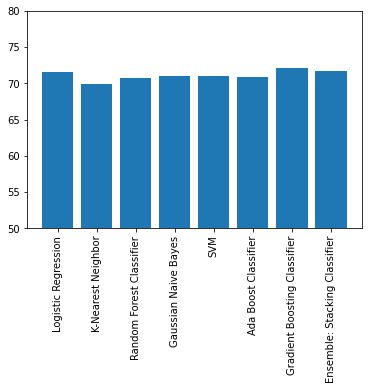

In [ ]:
model_bar(data1, 'Accuracy')

## **Kaggle**

In [ ]:
data2, labels2 = find_label(total_data2)

In [ ]:
data2, X_train, X_val, Y_train, Y_val = split_data(data2, labels2)

In [ ]:
model5 = RandomForestClassifier()
print("Model 5 : Random Forest Classifier", "\n")
model5.fit(X_train, Y_train)
prediction = model5.predict(X_val)
print("Acurracy of the model :", accuracy_score(Y_val, prediction), "\n")
print("Confusion matrix :","\n", confusion_matrix(Y_val, prediction), "\n")
print(classification_report(Y_val, prediction), "\n")

In [ ]:
data2.columns

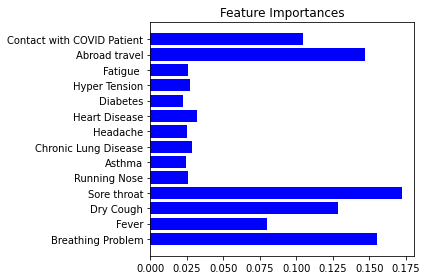

In [ ]:
importance = model5.feature_importances_
import matplotlib.pyplot as plt
plt.title('Feature Importances')
plt.barh(['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat',
       'Running Nose', 'Asthma', 'Chronic Lung Disease', 'Headache',
       'Heart Disease', 'Diabetes', 'Hyper Tension', 'Fatigue ',
       'Abroad travel', 'Contact with COVID Patient'], importance, color='b', align='center')
#plt.barh(['age_decade', 'ftg', 'fever', 'gender_label', 'loss_of_smell', 'cough'],
#        importance, color='b', align='center')
plt.tight_layout()
image_format = 'svg' # e.g .png, .svg, etc.
image_name = 'feature_importance.svg'
plt.savefig(image_name, format=image_format, dpi=1200)
plt.show()

In [ ]:
def find_scores(data, model):
  scores = cross_validate(model, data, labels2, cv=3, scoring=('accuracy', 'precision', 'recall', 'f1', 'roc_auc'), return_train_score=False)
  scores['test_accuracy'] = scores['test_accuracy'].mean()
  scores['fit_time'] = scores['fit_time'].mean()
  scores['test_precision'] = scores['test_precision'].mean()
  scores['test_recall'] = scores['test_recall'].mean()
  scores['test_f1'] = scores['test_f1'].mean()
  scores['test_roc_auc'] = scores['test_roc_auc'].mean()
  scores['score_time'] = scores['score_time'].mean()
  scores.pop('score_time')
  scores.pop('fit_time')
  df = pd.DataFrame.from_dict([scores])
  return df

In [ ]:
def summary_report2(data):
  #data, X_train, X_val, Y_train, Y_val = split_data(data)
  #results = {}
  model_names = ['Logistic Regression', 'K-Nearest Neighbors', 'Random Forest Classifier', 'Gaussian Naive Bayes', 'SVM',
                 'Ada Boost Classifier', 'Gradient Boosting Classifier', 'Ensemble: Stacking Classifier']
                 #, 'Ensemble: VotingClassifier']
  score_param = ['Accuracy', 'F1 Score', 'Precision', 'Recall', 'AUC-ROC']

  scores = pd.DataFrame()
  model1 = LogisticRegression()
  scores = scores.append(find_scores(data, model1), ignore_index=True)
  #model2 = LinearDiscriminantAnalysis()
  #scores = scores.append(find_scores(data, model2), ignore_index=True)
  model3 = KNeighborsClassifier()
  scores = scores.append(find_scores(data, model3), ignore_index=True)
  #model4 = DecisionTreeClassifier()
  #scores = scores.append(find_scores(data, model4), ignore_index=True)
  model5 = RandomForestClassifier()
  scores = scores.append(find_scores(data, model5), ignore_index=True)
  model6 = GaussianNB()
  scores = scores.append(find_scores(data, model6), ignore_index=True)
  model7 = SVC()
  scores = scores.append(find_scores(data, model7), ignore_index=True)
  #model8 = BaggingClassifier()
  #scores = scores.append(find_scores(data, model8), ignore_index=True)
  model9 = AdaBoostClassifier()
  scores = scores.append(find_scores(data, model9), ignore_index=True)
  model10 = GradientBoostingClassifier()
  scores = scores.append(find_scores(data, model10), ignore_index=True)
  estimators = [('LR', model1), ('KNN', model3), ('RF', model5),
                ('SVM', model7),  ('AB', model9), ('GB', model10)]
  model11 = StackingClassifier(estimators = estimators)
  scores = scores.append(find_scores(data, model11), ignore_index=True)
  scores.index = model_names
  scores.columns = score_param
  #scores['Training-Time'] = scores['Training-Time'].round(decimals = 4)
  scores['Accuracy'] = scores['Accuracy']*100
  scores['Accuracy'] = scores['Accuracy'].round(decimals = 2)
  scores['F1 Score'] = scores['F1 Score']*100
  scores['F1 Score'] = scores['F1 Score'].round(decimals = 2)
  scores['Precision'] = scores['Precision']*100
  scores['Precision'] = scores['Precision'].round(decimals = 2)
  scores['Recall'] = scores['Recall']*100
  scores['Recall'] = scores['Recall'].round(decimals = 2)
  scores['AUC-ROC'] = scores['AUC-ROC']*100
  scores['AUC-ROC'] = scores['AUC-ROC'].round(decimals = 2)
  pd.set_option('display.float_format','{:.3f}'.format)
  return scores

In [ ]:
summary_report2(data2)

,Accuracy,F1 Score,Precision,Recall,AUC-ROC
Logistic Regression,90.080,96.020,91.440,93.580,94.050
K-Nearest Neighbors,91.040,93.320,95.850,94.480,85.010
Random Forest Classifier,92.930,94.970,96.370,95.650,93.970
Gaussian Naive Bayes,65.400,99.430,57.470,72.520,94.810
SVM,92.360,94.970,95.620,95.290,94.060
Ada Boost Classifier,88.630,94.310,91.330,92.790,93.920
Gradient Boosting Classifier,92.640,95.400,95.460,95.420,94.850
Ensemble: Stacking Classifier,90.910,93.900,94.840,94.330,93.390


In [ ]:
def n_plotPCA(data):
    sc = StandardScaler()
    data2 = sc.fit_transform(data)
    #model_names = ['Logistic Regression', 'LDA', 'K-Neighbors Classifier', 'Decision Tree Classifier', 'Random Forest Classifier', 'Gaussian Naive Bayes', 'SVM',
                    #'Bagging Classifier', 'Ada Boost Classifier', 'Gradient Boosting Classifier', 'Ensemble: Stacking Classifier']
    #plt.figure(figsize=(100, 100)
    n_array = []
    acc = pd.DataFrame()
    for i in range(2, 12):
        n_array.append(i)
        name = 'n='+str(i)
        pca = PCA(n_components = i)
        data3 = pca.fit_transform(data2)
        explained_variance = pca.explained_variance_ratio_
        #print('Result for PCA : n_components=', i)
        score = summary_report2(data3)
        acc[name] = score['Accuracy']

    return n_array, acc

In [ ]:
n_array, acc = n_plotPCA(data2)

In [ ]:
acc

,n=2,n=3,n=4,n=5,n=6,n=7,n=8,n=9,n=10,n=11
Logistic Regression,92.580,92.310,92.450,92.580,91.880,91.310,90.430,90.560,91.000,91.530
K-Nearest Neighbors,92.580,91.720,92.070,91.630,90.450,89.550,90.020,88.770,89.450,88.980
Random Forest Classifier,92.180,92.710,93.190,93.320,92.840,92.710,92.600,92.880,93.230,92.730
Gaussian Naive Bayes,92.620,92.620,92.340,92.770,92.320,92.400,92.420,91.920,92.160,92.210
SVM,93.210,92.860,93.370,92.690,90.500,90.830,91.220,92.470,92.880,93.450
Ada Boost Classifier,92.010,91.350,92.180,92.490,91.810,93.630,92.820,93.320,93.480,93.390
Gradient Boosting Classifier,93.450,93.740,93.940,93.140,93.820,93.020,92.860,92.580,93.210,93.230
Ensemble: Stacking Classifier,92.670,91.850,92.600,92.970,92.030,92.100,92.510,92.900,92.770,93.230


In [ ]:
rf = pd.DataFrame(acc.iloc[[2,]]).to_numpy()[0]
ada = pd.DataFrame(acc.iloc[[4,]]).to_numpy()[0]

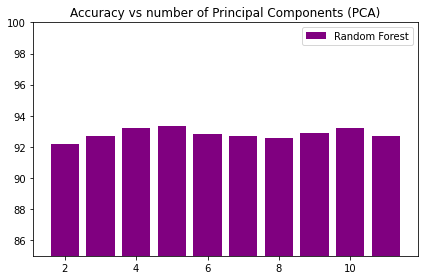

In [ ]:
plt.title('Accuracy vs number of Principal Components (PCA)')
plt.bar(n_array, rf, label='Random Forest' ,color='purple')
plt.ylim([85, 100])
plt.legend()
image_format = 'svg' # e.g .png, .svg, etc.
image_name = 'myimage.svg'
plt.tight_layout()
plt.savefig(image_name, format=image_format, dpi=1500)
plt.show()

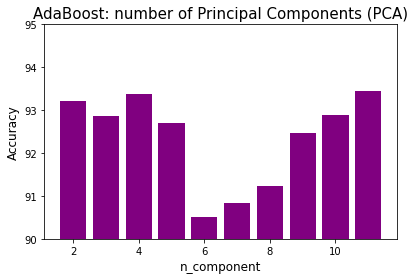

In [ ]:
plt.title('AdaBoost: number of Principal Components (PCA)', size = 15)
plt.bar(n_array, ada, color='purple')
plt.ylim([90, 95])
plt.ylabel('Accuracy', size=12)
plt.xlabel('n_component', size=12)
plt.xticks(size=10)
plt.yticks(size=10)
#plt.legend()
image_format = 'svg' # e.g .png, .svg, etc.
image_name = 'fig5.svg'
plt.tight_layout()
plt.savefig(image_name, format=image_format, dpi=1500)
plt.show()

In [ ]:
random_data = data2[4000:4800]
random_data = random_data[['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat',
       'Running Nose', 'Asthma', 'Chronic Lung Disease', 'Headache',
       'Heart Disease','Fatigue ',
       'Abroad travel', 'Contact with COVID Patient']]

r_labels = labels2[4000:4800]

In [ ]:
def find_scores(data, model):
  scores = cross_validate(model, data, r_labels, cv=3, scoring=('accuracy', 'precision', 'recall', 'f1', 'roc_auc'), return_train_score=False)
  scores['test_accuracy'] = scores['test_accuracy'].mean()
  scores['fit_time'] = scores['fit_time'].mean()
  scores['test_precision'] = scores['test_precision'].mean()
  scores['test_recall'] = scores['test_recall'].mean()
  scores['test_f1'] = scores['test_f1'].mean()
  scores['test_roc_auc'] = scores['test_roc_auc'].mean()
  scores['score_time'] = scores['score_time'].mean()
  scores.pop('score_time')
  scores.pop('fit_time')
  df = pd.DataFrame.from_dict([scores])
  return df

In [ ]:
def n_plotISOMAP(data):
    n_array = []
    rf = []
    #from scipy import sparse
    #data3 = sparse.csr_matrix(data)
    for i in range(2, 9):
        n_array.append(i)
        embedding = Isomap(n_components=i)
        data2 = embedding.fit_transform(data[:len(data)])
        score = summary_report2(data2)
        rf.append(score['Accuracy'][4])
    return n_array, rf

In [ ]:
embedding = Isomap(n_components=6)
data3 = embedding.fit_transform(data2)

In [ ]:
score = summary_report2(data3)

In [ ]:
score

,Accuracy,F1 Score,Precision,Recall,AUC-ROC
Logistic Regression,89.930,93.320,94.140,93.690,93.700
K-Nearest Neighbors,88.590,93.040,92.900,92.810,83.520
Random Forest Classifier,91.150,93.510,95.710,94.540,94.310
Gaussian Naive Bayes,90.650,94.380,93.910,94.050,93.960
SVM,90.720,92.170,96.740,94.380,93.440
Ada Boost Classifier,92.030,93.700,96.600,95.110,92.190
Gradient Boosting Classifier,92.510,95.000,95.710,95.330,94.280
Ensemble: Stacking Classifier,89.860,91.370,96.580,93.850,94.640


In [ ]:
n_array2, rf2 = n_plotISOMAP(random_data)

In [ ]:
rf2

[95.25, 96.5, 96.87, 96.62, 97.0, 96.62, 97.0]

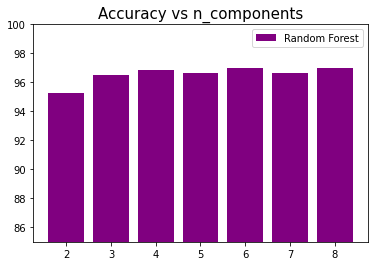

In [ ]:
plt.title('Accuracy vs n_components', size=15)
plt.bar(n_array2, rf2, label='Random Forest' ,color='purple')
plt.ylim([85, 100])
plt.legend()
plt.show()

In [ ]:
def find_scores(data, model):
  scores = cross_validate(model, data, labels2, cv=3, scoring=('accuracy', 'precision', 'recall', 'f1', 'roc_auc'), return_train_score=False)
  scores['test_accuracy'] = scores['test_accuracy'].mean()
  scores['fit_time'] = scores['fit_time'].mean()
  scores['test_precision'] = scores['test_precision'].mean()
  scores['test_recall'] = scores['test_recall'].mean()
  scores['test_f1'] = scores['test_f1'].mean()
  scores['test_roc_auc'] = scores['test_roc_auc'].mean()
  scores['score_time'] = scores['score_time'].mean()
  scores.pop('score_time')
  scores.pop('fit_time')
  df = pd.DataFrame.from_dict([scores])
  return df

In [ ]:
def plotUMAP(data):
    rf = []
    reducer = umap.UMAP()
    data2 = reducer.fit_transform(data)
    score = summary_report2(data2)
    rf.append(score['Accuracy'][4])
    return rf

In [ ]:
rf3 = plotUMAP(data2)

/usr/local/lib/python3.7/dist-packages/umap/spectral.py:261: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  "WARNING: spectral initialisation failed! The eigenvector solver\n"


In [ ]:
rf3

[83.99]

In [ ]:
def feature_score(data, var):
    import umap.umap_ as umap
    model_names = ['Logistic Regression', 'K-Neighbors Classifier', 'Random Forest Classifier', 'SVM',
                 'Ada Boost Classifier', 'Gradient Boosting Classifier', 'Ensemble: Stacking Classifier']

    sc = StandardScaler()
    data1 = sc.fit_transform(data)
    pca = PCA(n_components = 7)
    data1 = pca.fit_transform(data1)

    reducer = umap.UMAP()
    data2 = reducer.fit_transform(data)

    #embedding = Isomap(n_components=11)
    #data3 = embedding.fit_transform(data[:len(data)])

    tabular_score = pd.DataFrame()

    score = summary_report2(data)
    nofr = score[var]
    tabular_score['Without FR'] = nofr
    score1 = summary_report2(data1)
    pca = score1[var]
    tabular_score['PCA'] = pca
    score2 = summary_report2(data2)
    umap = score2[var]
    tabular_score['UMAP'] = umap
    #score3 = summary_report2(data3)
    #isomap = score3[var]
    #tabular_score['ISOMAP'] = isomap

    return tabular_score
    '''plt.plot(model_names, nofr, linestyle='--', linewidth=2, color='orange', label='Without FR Techniques')
    plt.plot(model_names, pca, linestyle='--', linewidth=2, color='red', label='PCA')
    plt.plot(model_names, umap, linestyle='--', linewidth=2, color='blue', label='UMAP')
    plt.plot(model_names, isomap, linestyle='--', linewidth=2, color='green', label='ISOMAP')
    plt.xticks(rotation=90)
    plt.legend()
    return plt, tabular_score
    '''

In [ ]:
tb = feature_score(data2, 'Accuracy')

In [ ]:
tb

,Without FR,PCA,UMAP
Logistic Regression,90.080,91.310,82.060
K-Nearest Neighbors,91.040,90.150,87.060
Random Forest Classifier,93.060,93.540,87.820
Gaussian Naive Bayes,65.400,92.400,81.970
SVM,92.360,90.830,83.770
Ada Boost Classifier,88.630,93.630,85.440
Gradient Boosting Classifier,92.050,93.020,86.050
Ensemble: Stacking Classifier,90.470,91.850,87.250


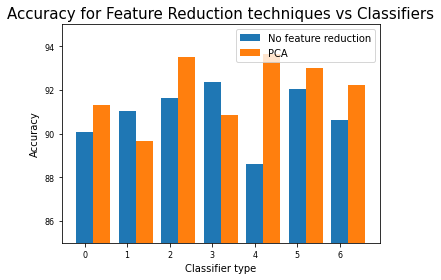

In [ ]:
w = 0.4

model_names = ['Logistic Regression', 'K-Neighbors Classifier', 'Random Forest Classifier', 'SVM',
                 'Ada Boost Classifier', 'Gradient Boosting Classifier', 'Ensemble: Stacking Classifier']

nofr = tb['Without FR']
pca = tb['PCA']
#umap = tb['UMAP']

bar1 = np.arange(len(model_names))
bar2 = [i+w for i in bar1]
#bar3 = [i+w for i in bar2]
'''bar4 = [i+w for i in bar3]
bar5 = [i+w for i in bar4]
bar6 = [i+w for i in bar5]
bar7 = [i+w for i in bar6]
'''
fig = plt.figure()
plt.xlabel('Classifier type', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy for Feature Reduction techniques vs Classifiers', fontsize=15)
plt.xticks(size=8)
plt.yticks(size=8)
plt.bar(bar1, nofr, w, label='No feature reduction')
plt.bar(bar2, pca, w, label='PCA')
#plt.bar(bar3, umap, w, label='UMAP')
plt.legend(fontsize=10)
plt.ylim([85,95])
image_format = 'svg' # e.g .png, .svg, etc.
image_name = 'myimage2.svg'
plt.tight_layout()
plt.savefig(image_name, format=image_format, dpi=1500)
plt.show()

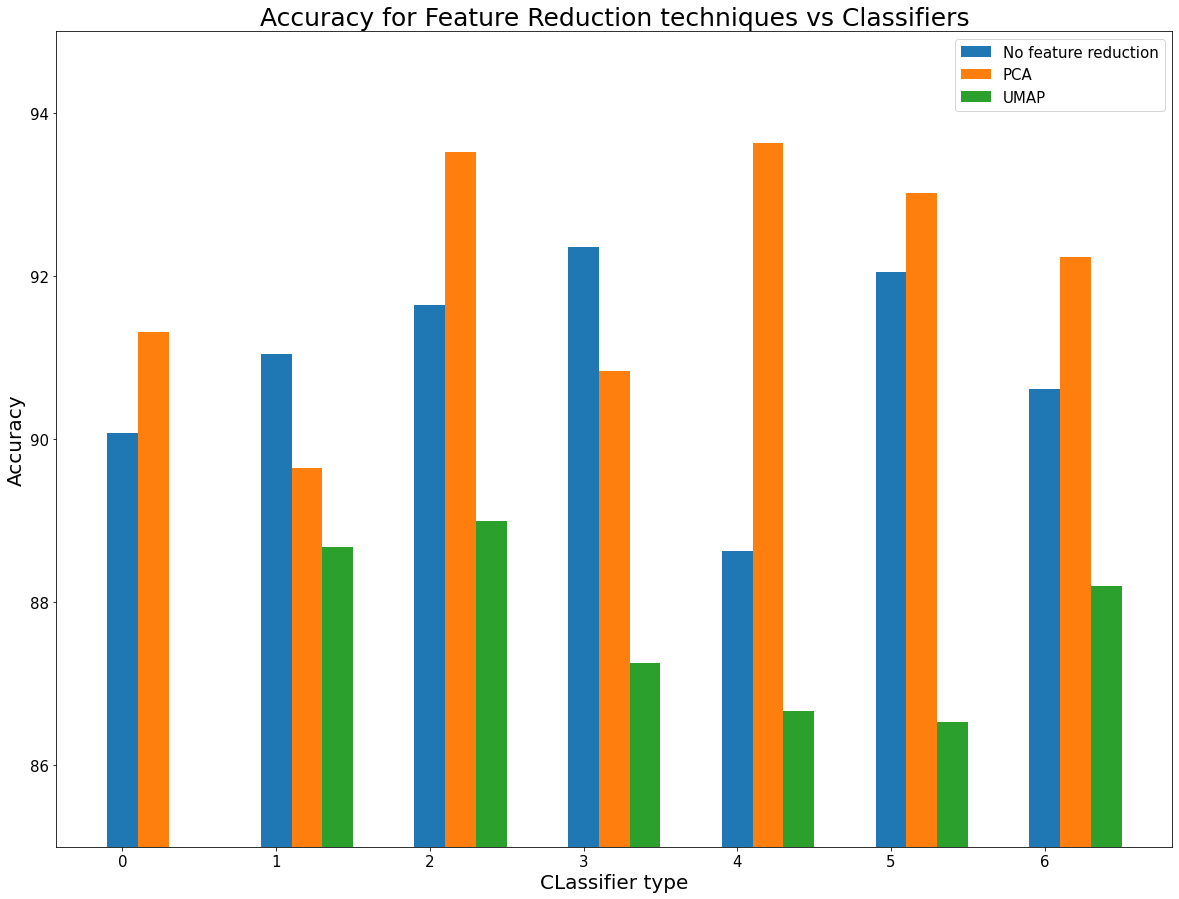

In [ ]:
w = 0.2

model_names = ['Logistic Regression', 'K-Neighbors Classifier', 'Random Forest Classifier', 'SVM',
                 'Ada Boost Classifier', 'Gradient Boosting Classifier', 'Ensemble: Stacking Classifier']

nofr = tb['Without FR']
pca = tb['PCA']
umap = tb['UMAP']

bar1 = np.arange(len(model_names))
bar2 = [i+w for i in bar1]
bar3 = [i+w for i in bar2]
'''bar4 = [i+w for i in bar3]
bar5 = [i+w for i in bar4]
bar6 = [i+w for i in bar5]
bar7 = [i+w for i in bar6]
'''
fig = plt.figure(figsize = (20, 15))
plt.xlabel('CLassifier type', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)
plt.title('Accuracy for Feature Reduction techniques vs Classifiers', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.bar(bar1, nofr, w, label='No feature reduction')
plt.bar(bar2, pca, w, label='PCA')
plt.bar(bar3, umap, w, label='UMAP')
plt.legend(fontsize=15)
plt.ylim([85,95])
plt.show()

# **Result : Kaggle, PCA (n_comp = 7), AdaBoost/RF**

## **Other options : All algos (12), Coswara, UMAP, ISOMAP?, n_comp variations in PCA**